* Data: https://www.kaggle.com/datasets/robikscube/rollercoaster-database

# Step 1: Import Libraries and Data

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
# pd.set_option('max_columns', 200)

In [2]:
# load the data
df = pd.read_csv("coaster_db.csv")

In [3]:
# show the first 5 rows
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


# Step 2: Understanding Data

In [4]:
# check the shape of the dataframe
# we have 1087 rows with 56 columns
df.shape

(1087, 56)

In [5]:
# check the columns' name
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
# check the type of data in each columns
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [7]:
# check if there are any some null or empty values in data in each columns
df.isnull().sum()

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

In [8]:
# description information about the dataframe
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [9]:
# OR which show the some short of info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

# Step 3: Data Preparation

* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

In [10]:
# filter only the needed col and asigned to a new dataframe
# create a copy to a new variable
df_main = df[['coaster_name', 'Location', 'Status','Manufacturer','year_introduced',
        'latitude', 'longitude','Type_Main','opening_date_clean',
       'speed_mph', 'height_ft','Inversions_clean', 'Gforce_clean']].copy()

df_main.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [11]:
# convert oepning_date_clean from object to date
df_main['opening_date_clean'] = pd.to_datetime(df_main['opening_date_clean'])

In [12]:
# check dataframe info again
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   coaster_name        1087 non-null   object        
 1   Location            1087 non-null   object        
 2   Status              874 non-null    object        
 3   Manufacturer        1028 non-null   object        
 4   year_introduced     1087 non-null   int64         
 5   latitude            812 non-null    float64       
 6   longitude           812 non-null    float64       
 7   Type_Main           1087 non-null   object        
 8   opening_date_clean  837 non-null    datetime64[ns]
 9   speed_mph           937 non-null    float64       
 10  height_ft           171 non-null    float64       
 11  Inversions_clean    1087 non-null   int64         
 12  Gforce_clean        362 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), obje

In [13]:
df_main.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [14]:
# rename the columns
df_main.rename(columns={
    'coaster_name':'Coaster_Name',
    'year_introduced':'Year_Introduced',
    'latitude':'Latitude',
    'Longitude':'Longitude',
    'opening_date_clean':'Opening_Date',
    'speed_mph':'Speed_Mph',
    'height_ft':'Height_Ft',
    'Inversions_clean':'Inversions_Clean',
    'Gforce_clean': 'Gforce_Clean'
}, inplace=True)

df_main.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'longitude', 'Type_Main', 'Opening_Date', 'Speed_Mph',
       'Height_Ft', 'Inversions_Clean', 'Gforce_Clean'],
      dtype='object')

In [15]:
# recheck the dataframe
df_main.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions_Clean,Gforce_Clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [16]:
# re-check the missing or null value in the new dataframe again
df_main.isna().sum()

Coaster_Name          0
Location              0
Status              213
Manufacturer         59
Year_Introduced       0
Latitude            275
longitude           275
Type_Main             0
Opening_Date        250
Speed_Mph           150
Height_Ft           916
Inversions_Clean      0
Gforce_Clean        725
dtype: int64

In [17]:
# check what rows and column has duplicated value
# remove the duplicated value in the dataframe
# since we don't any duplicated value as seen, we don't have to perform removing duplicated
# if have df_main.duplicated()
df_main.loc[df_main.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions_Clean,Gforce_Clean


In [18]:
# check the duplicated value in the coaster name
df_main.loc[df_main.duplicated(subset=['Coaster_Name'])].head(5)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions_Clean,Gforce_Clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [19]:
# to check the specific coaster name whether it has dupblicated or not
df_main.query('Coaster_Name == "La Vibora"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions_Clean,Gforce_Clean
216,La Vibora,Other,NaN,Intamin,1984,NaN,NaN,Steel,NaT,32.0,NaN,0,NaN
239,La Vibora,Other,NaN,Intamin,1986,NaN,NaN,Steel,NaT,32.0,NaN,0,NaN
252,La Vibora,Other,NaN,Intamin,1987,NaN,NaN,Steel,NaT,32.0,NaN,0,NaN


In [20]:
# remove the data of the col: coaster name, location, opening date that are the same
df_main = df_main.loc[~df_main.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])].reset_index(drop=True).copy()

In [22]:
df_main.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions_Clean,Gforce_Clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [21]:
# check the shape of the data
df_main.shape

(990, 13)

# Step 4: Feature Understadning

(Univariate analysis)
* Plotting Feature Distributions
    * Histogram
    * KDE
    * Boxplot

Text(0, 0.5, 'Count')

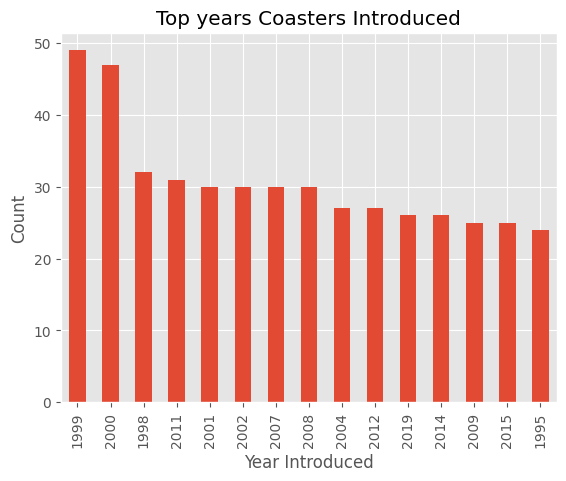

In [39]:
ax = df['year_introduced'].value_counts() \
    .head(15) \
    .plot(kind='bar', title='Top years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

<AxesSubplot: ylabel='Frequency'>

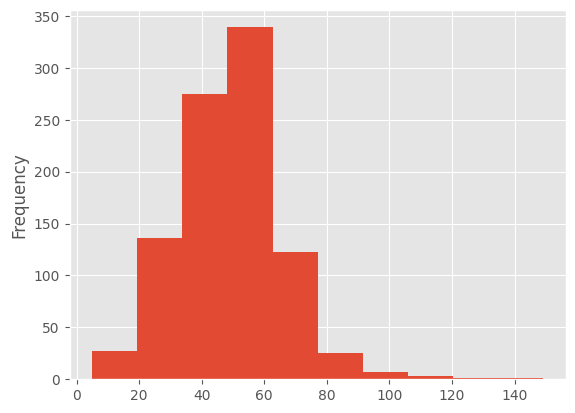

In [41]:
df['speed_mph'].plot(kind='hist')

Text(0.5, 0, 'Speed (mph)')

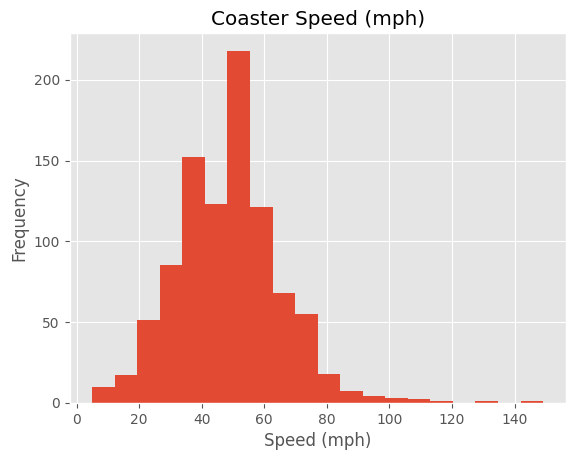

In [48]:
ax = df['speed_mph'].plot(kind='hist', bins=20, title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

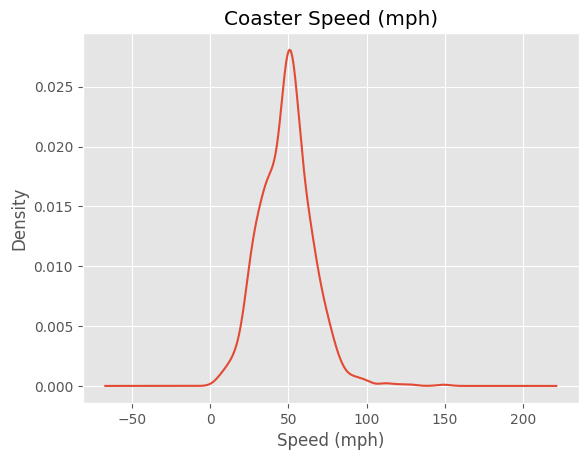

In [49]:
ax = df['speed_mph'].plot(kind='kde', title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

# Step 5: Feature Relationship

* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby Comparisons

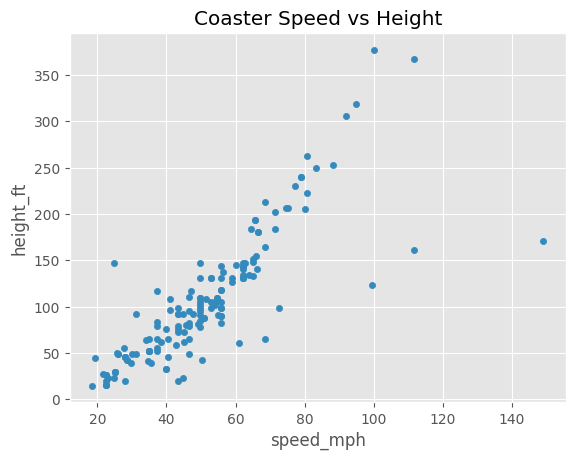

In [52]:
df.plot(kind='scatter', x='speed_mph', y='height_ft', title='Coaster Speed vs Height')
plt.show()

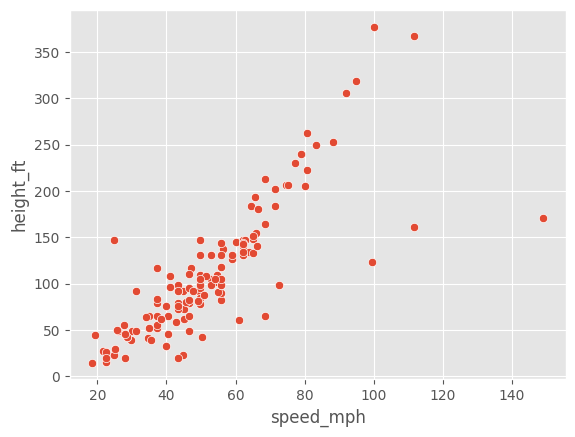

In [54]:
sns.scatterplot(data=df, x='speed_mph', y='height_ft')
plt.show()

In [59]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

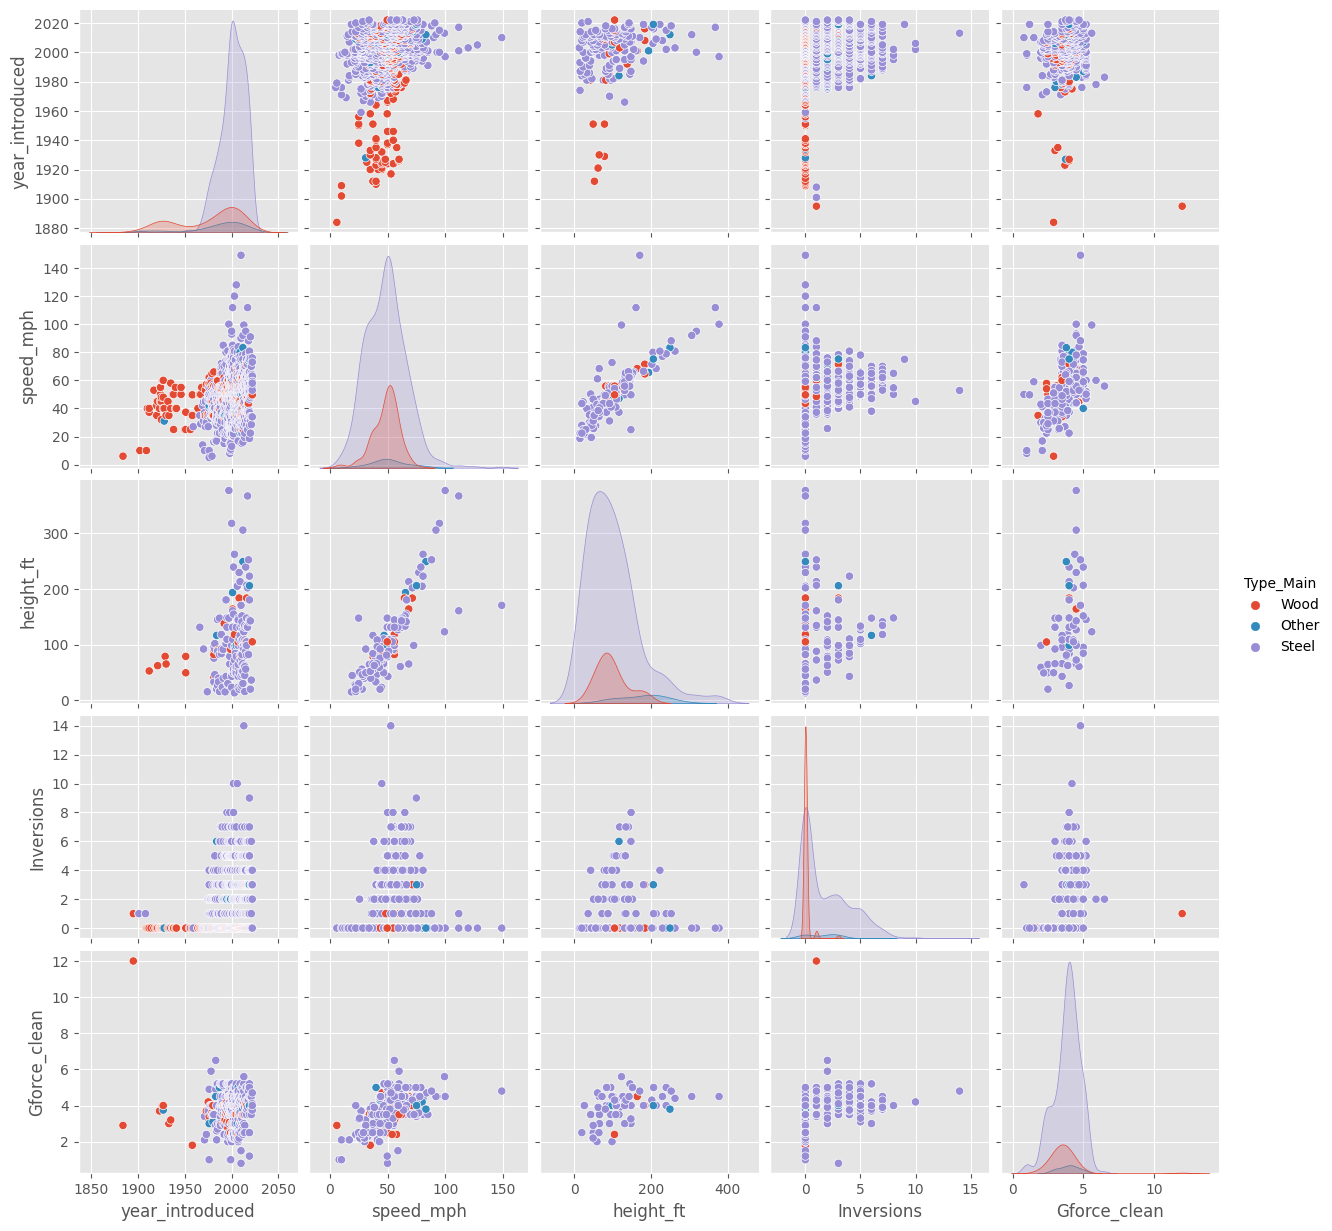

In [62]:
sns.pairplot(data=df, vars=['year_introduced', 'speed_mph', 'height_ft', 'Inversions', 'Gforce_clean'], hue='Type_Main')
plt.show()

In [63]:
df[['year_introduced', 'speed_mph', 'height_ft', 'Inversions', 'Gforce_clean']].dropna().corr()

,year_introduced,speed_mph,height_ft,Inversions,Gforce_clean
year_introduced,1.000000,0.162603,0.144997,-0.146500,0.137225
speed_mph,0.162603,1.000000,0.762588,-0.014154,0.579408
height_ft,0.144997,0.762588,1.000000,-0.083036,0.478811
Inversions,-0.146500,-0.014154,-0.083036,1.000000,0.321125
Gforce_clean,0.137225,0.579408,0.478811,0.321125,1.000000
